In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [30]:
from sympy import Eq, diff, symbols, expand, solve

In [48]:
def original_function(coeffs, x):
    a, b = coeffs[0], coeffs[1]
    return a * x * np.e ** (b * x)

In [49]:
def reworked_function(coeffs, x):
    a, b = coeffs[0], coeffs[1]
    return a + np.log(x) + b * x

In [50]:
nodes = np.array([0.1, 0.2, 0.4, 0.6, 0.9, 1.3, 1.5, 1.7, 1.8])

In [51]:
values = np.array([0.75, 1.25, 1.45, 1.25, 0.85, 0.55, 0.35, 0.28, 0.18])

In [52]:
a, b = symbols('a, b')
coeffs = (a, b)

In [53]:
phi = 0

In [54]:
for node, val in zip(nodes, values):
    phi += (np.log(val) - reworked_function(coeffs, node)) ** 2

In [55]:
eq1 = Eq(diff(phi, a), 0)
eq2 = Eq(diff(phi, b), 0)

In [56]:
solutions = solve([eq1, eq2])

In [57]:
new_coeffs = (np.e ** solutions[a], solutions[b])

In [58]:
x_axis = np.linspace(min(nodes), max(nodes), 1000)

In [59]:
y_axis = original_function(new_coeffs, x_axis)

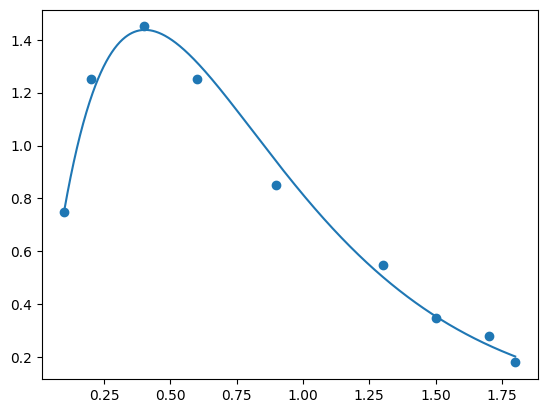

In [62]:
plt.scatter(nodes, values)
plt.plot(x_axis, y_axis)
plt.show()